In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from google.cloud import vision

In [15]:
data = []
labels = []
classes = 43
cur_dir = os.getcwd()
print(cur_dir)

E:\SiH-Frame-Demo\Sign Board Detection


In [16]:
for i in range(classes):
    path = os.path.join(cur_dir,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading images")

data = np.array(data)
labels = np.array(labels)
print("Final label"+str(labels))
print("Final data"+str(data))

Final label[ 0  0  0 ... 42 42 42]
Final data[[[[ 75  78  80]
   [ 74  76  78]
   [ 85  86  84]
   ...
   [ 68  75  74]
   [ 65  69  68]
   [ 66  67  66]]

  [[ 83  84  86]
   [ 80  80  82]
   [ 88  88  83]
   ...
   [ 73  77  78]
   [ 76  78  75]
   [ 80  80  78]]

  [[ 78  78  80]
   [ 86  85  86]
   [ 90  89  90]
   ...
   [ 71  74  71]
   [ 73  74  69]
   [ 78  78  74]]

  ...

  [[133 134 139]
   [123 127 132]
   [112 121 125]
   ...
   [ 94  95  89]
   [ 97  98  91]
   [ 99 103  99]]

  [[ 91  95  99]
   [ 91  98 103]
   [ 75  86  90]
   ...
   [104 102  96]
   [110 113 104]
   [ 96 104  98]]

  [[ 85  84  87]
   [ 95 101 107]
   [ 63  76  81]
   ...
   [103 103  95]
   [ 99 102  90]
   [ 90  97  89]]]


 [[[ 69  73  73]
   [ 76  79  79]
   [ 75  77  77]
   ...
   [ 76  81  80]
   [ 71  77  77]
   [ 66  68  70]]

  [[ 65  69  69]
   [ 74  76  76]
   [ 84  84  83]
   ...
   [ 90  83  89]
   [ 74  79  84]
   [ 67  69  73]]

  [[ 63  68  68]
   [ 71  72  72]
   [ 81  79  77]
   ...


In [6]:
print(data.shape,labels.shape)
X_train,X_test,Y_train,Y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

Y_train = to_categorical(Y_train,43)
Y_test = to_categorical(Y_test,43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
epochs = 5
histroy = model.fit(X_train,Y_train,batch_size = 64, epochs = epochs , validation_data=(X_test,Y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/5
31367/31367 [==============================] - 163s 5ms/step - loss: 1.1129 - accuracy: 0.6799 - val_loss: 0.3675 - val_accuracy: 0.8948
Epoch 2/5
31367/31367 [==============================] - 161s 5ms/step - loss: 0.4816 - accuracy: 0.8593 - val_loss: 0.1264 - val_accuracy: 0.9657
Epoch 3/5
31367/31367 [==============================] - 162s 5ms/step - loss: 0.3369 - accuracy: 0.9011 - val_loss: 0.0920 - val_accuracy: 0.9769
Epoch 4/5
31367/31367 [==============================] - 163s 5ms/step - loss: 0.2590 - accuracy: 0.9259 - val_loss: 0.0808 - val_accuracy: 0.9777
Epoch 5/5
31367/31367 [==============================] - 164s 5ms/step - loss: 0.2141 - accuracy: 0.9394 - val_loss: 0.0709 - val_accuracy: 0.9814


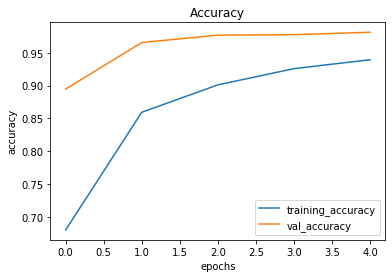

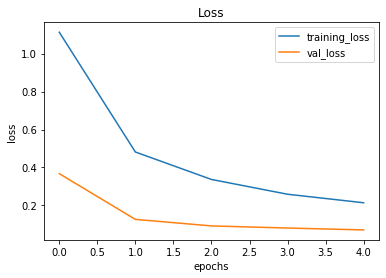

In [17]:
plt.figure(0)
plt.plot(histroy.history['accuracy'],label='training_accuracy')
plt.plot(histroy.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(1)
plt.plot(histroy.history['loss'],label='training_loss')
plt.plot(histroy.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

In [22]:
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [22]:
pred = model.predict_classes(X_test)

In [23]:
print(accuracy_score(labels, pred))

0.947901821060966


In [26]:
model.save('traffic_classi00fier.h5')